# Benchmarcks and plots of various SVM RL envs

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
t = np.array(([[1,2,3]]))
a = np.squeeze(t)
print(t, t.shape)
print(a, a.shape)

[[1 2 3]] (1, 3)
[1 2 3] (3,)


## Benchmarks of the SVM RL env 1 with a single ddpg std agent

The hyperparameters chosen are
- $\gamma = 1.0$
- $\tau = 0.001$
- $lr_{act} = lr_{cri} = 0.0001$
- batch size = 1
- $\#$ update = 1
- update evry = 1 step

## Benchmarks of the SVM RL env 1 with a single ddpg std agent

The hyperparameters chosen are
- $\gamma = 1.0$
- $\tau = 0.001$
- $lr_{act} = lr_{cri} = 0.0001$
- batch size = 64
- $\#$ update = 4
- update evry = 1 step

### Various graphs of the episode of the SVM RL env 1

In [12]:
import h5py
import numpy as np
import os

i = 2
dataFile = h5py.File(f'run_{i}.hdf5', 'a')

rewards = np.loadtxt('rewards_RL_0.out')
dataFile.create_dataset('rewards', dtype='f', data=rewards)

In [16]:
dataFile['rewards']['rew_ep0'][:]

array([-2.097586, -1.819518, -1.214129, -1.213711, -1.204922, -1.151654,
       -1.07944 , -1.032273, -0.641619, -0.625386], dtype=float32)

In [10]:
dataFile['rewards'][:]

array([[-2.097586, -1.819518, -1.214129, -1.213711, -1.204922, -1.151654,
        -1.07944 , -1.032273, -0.641619, -0.625386],
       [-2.040403, -1.687567, -1.591443, -1.326922, -1.286151, -1.115311,
        -1.109159, -1.084867, -1.082253, -1.046719],
       [-2.400646, -1.995773, -1.912868, -0.606235, -0.220302, -0.205606,
        -0.187535, -0.187503, -0.057278, -0.038468],
       [-2.246094, -1.962825, -1.732629, -1.523941, -1.282305, -0.682371,
         1.05025 ,  1.138941,  1.147272,  1.178425],
       [-2.22186 , -2.134386, -1.263168, -1.249024, -1.246277, -1.244754,
        -1.179387, -1.174609, -1.139255, -0.935163],
       [-2.43924 , -1.847612, -1.847577, -1.805819, -0.930279, -0.926055,
        -0.295607, -0.260953, -0.120951,  0.159909],
       [-2.232812, -2.199266, -2.023464, -0.905724, -0.355396,  4.412713,
         4.420112,  4.431412,  4.432128,  4.432253],
       [-2.059937, -2.053087, -1.930531, -0.966651, -0.966436, -0.94982 ,
        -0.912961, -0.831424, -0.8248

The max score is at episode 6 and is equal to 14.412
The max score is at episode 4 and is equal to -13.788


Text(0.5, 0, 'Episode #')

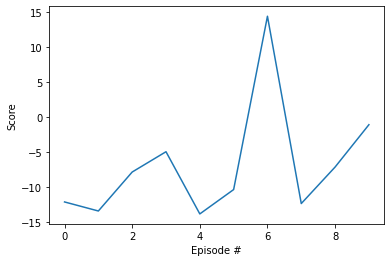

In [2]:
## Score cllection
rewards = np.loadtxt('rewards_RL_0.out')
scores = np.zeros(len(rewards))

for i in range(len(rewards)):
    scores[i] = np.sum(rewards[i])

## Max and min
index_max = np.argmax(scores)
index_min = np.argmin(scores)
print('The max score is at episode {} and is equal to {:.3f}'.format(index_max, scores[index_max]))
print('The max score is at episode {} and is equal to {:.3f}'.format(index_min, scores[index_min]))
    
## Plot scores    
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')

This episode collected a score of =  14.411955999999996


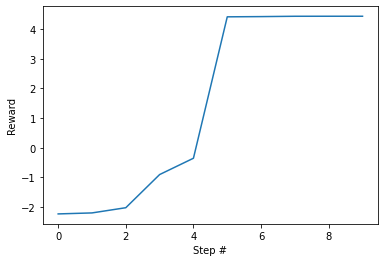

In [3]:
## Plot rewards of episode with max score

plt.plot(np.arange(len(rewards[index_max])), rewards[index_max])
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.sum(rewards[index_max]))

The last energy reached is =  -0.07036


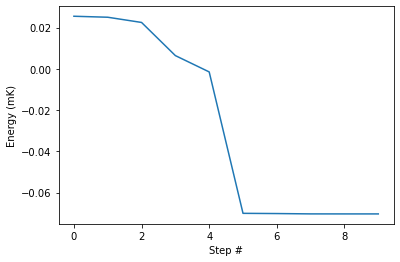

In [4]:
## Plot energies

energies = np.loadtxt('energies_RL_0.out')

plt.plot(np.arange(len(energies[index_max])), energies[index_max])
plt.ylabel('Energy (mK)')
plt.xlabel('Step #')

print('The last energy reached is = ',energies[index_max,-1])

The last princip dim reached is =  10.0


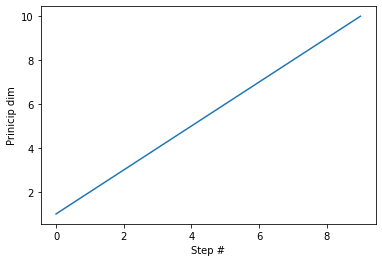

In [5]:
## Plot princip dim of episode with max score

dim = np.loadtxt('princip_dims_RL_0.out')

plt.plot(np.arange(len(dim[index_max])), dim[index_max])
plt.ylabel('Prinicip dim')
plt.xlabel('Step #')

print('The last princip dim reached is = ', dim[index_max,-1])

This episode collected a score of =  -13.787882999999999


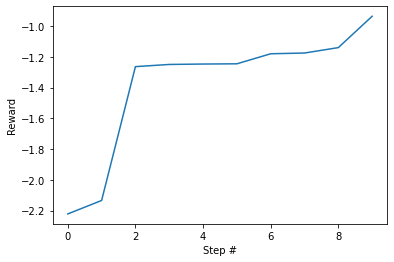

In [6]:
## Plot rewards of episode with max score

plt.plot(np.arange(len(rewards[index_min])), rewards[index_min])
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.sum(rewards[index_min]))

The last energy reached is =  0.006825


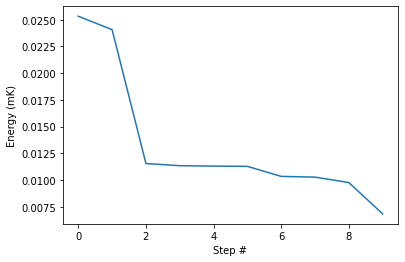

In [7]:
## Plot energies

energies = np.loadtxt('energies_RL_0.out')

plt.plot(np.arange(len(energies[index_min])), energies[index_min])
plt.ylabel('Energy (mK)')
plt.xlabel('Step #')

print('The last energy reached is = ',energies[index_min,-1])

The last princip dim reached is =  10.0


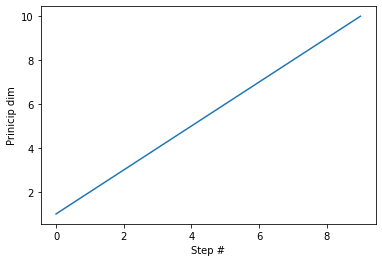

In [8]:
## Plot princip dim of episode with max score

dim = np.loadtxt('princip_dims_RL_0.out')

plt.plot(np.arange(len(dim[index_min])), dim[index_min])
plt.ylabel('Prinicip dim')
plt.xlabel('Step #')

print('The last princip dim reached is = ', dim[index_min,-1])